<a href="https://colab.research.google.com/github/ccwu0918/Python_Development_Bible/blob/main/ch07/ch07%E8%87%89%E9%83%A8%E8%BE%A8%E8%AD%98%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## face_engine：簡單易用的臉部辨識

In [1]:
!git clone https://github.com/ccwu0918/Python_Development_Bible

Cloning into 'Python_Development_Bible'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 268 (delta 30), reused 89 (delta 14), pack-reused 117
Receiving objects: 100% (268/268), 116.76 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Checking out files: 100% (214/214), done.


In [2]:
!pip install face-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 4.9 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [6]:
!mkdir -p /usr/local/lib/python3.7/dist-packages/face_engine/resources/data/

In [7]:
%cd /content/Python_Development_Bible/ch07/

/content/Python_Development_Bible/ch07


In [8]:
!cp "dlib_face_recognition_resnet_model_v1.dat" /usr/local/lib/python3.7/dist-packages/face_engine/resources/data
!cp "shape_predictor_5_face_landmarks.dat" /usr/local/lib/python3.7/dist-packages/face_engine/resources/data

In [12]:
from face_engine import FaceEngine
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

{}


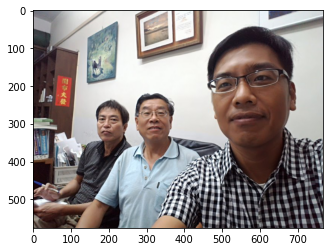

In [13]:
engine = FaceEngine()
# filename = 'person1.jpg'
# filename = 'person2.jpg'
filename = 'person3.jpg'
try:
  _, boxes = engine.find_faces(filename)
  print(boxes)

  img = Image.open(filename)
  drawing = ImageDraw.Draw(img)
  for i in range(len(boxes)):
      drawing.rectangle(boxes[i], outline='white', width=2)
  plt.imshow(img)
  plt.show()
except:
  print('未偵測到人臉！')

In [ ]:
engine = FaceEngine()
img1 = 'sample1.jpg'
# img1 = 'sample2.jpg'
# img1 = 'sample3.jpg'
img2 = 'person3.jpg'
score, box = engine.compare_faces(img1, img2)
print(score, box)
img = Image.open(img2)
drawing = ImageDraw.Draw(img)
drawing.rectangle(box, outline='white', width=2)
plt.imshow(img)
plt.show()

In [ ]:
engine = FaceEngine()
img1 = 'sample1.jpg'
img2 = 'sample2.jpg'
img3 = 'sample3.jpg'
engine.fit([img1, img2, img3], ['jeng', 'chiou', 'david'])

testimage = 'catch.jpg'
# testimage = 'person2.jpg'
names, boxes = engine.make_prediction(testimage)
print(names, boxes)
img = Image.open(testimage)
drawing = ImageDraw.Draw(img)
for i in range(len(boxes)):
    drawing.rectangle(boxes[i], outline='white', width=2)
plt.imshow(img)
plt.show()

In [ ]:
engine = FaceEngine()
img1 = 'sample1.jpg'
img2 = 'sample2.jpg'
img3 = 'sample3.jpg'
engine.fit([img1, img2, img3], ['jeng', 'chiou', 'david'])
engine.save('ehappy.p')

In [ ]:
from face_engine import load_engine

engine = load_engine('ehappy.p')
testimage = 'catch.jpg'
names, boxes = engine.make_prediction(testimage)
print(names, boxes)

## face-recognition：效果絕佳的人臉辨識

In [17]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=d511fe881c62143c4ecc849596ad75ac6bd22cd062b942f4849f62f567c4a5d7
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [18]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

[(414, 745, 450, 709), (274, 333, 310, 297), (290, 242, 334, 199), (254, 273, 290, 237), (406, 637, 442, 601), (402, 845, 438, 809), (362, 569, 398, 533), (270, 409, 306, 373), (278, 481, 314, 445), (278, 809, 314, 773), (306, 721, 342, 685), (310, 645, 346, 609)]


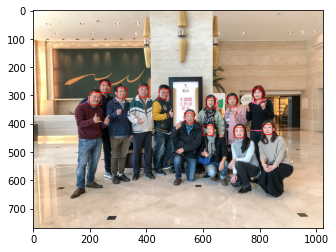

In [19]:
# filename = 'person1.jpg'
# filename = 'person2.jpg'
# filename = 'person3.jpg'
filename = 'person12.jpg'
image = face_recognition.load_image_file(filename)
boxes = face_recognition.face_locations(image)
print(boxes)

img = Image.open(filename)
drawing = ImageDraw.Draw(img)
for i in range(len(boxes)):
    drawing.rectangle((boxes[i][3],boxes[i][0],boxes[i][1],boxes[i][2]), outline='red', width=2)
plt.imshow(img)
plt.show()

[{'chin': [(74, 215), (78, 253), (82, 290), (93, 326), (112, 358), (140, 384), (170, 407), (201, 423), (234, 426), (265, 416), (288, 391), (309, 364), (326, 334), (335, 302), (341, 269), (344, 235), (346, 201)], 'left_eyebrow': [(112, 204), (127, 185), (149, 173), (175, 170), (199, 176)], 'right_eyebrow': [(238, 172), (262, 163), (287, 163), (310, 171), (325, 188)], 'nose_bridge': [(219, 199), (220, 220), (221, 241), (222, 262)], 'nose_tip': [(194, 280), (208, 281), (223, 284), (237, 279), (251, 275)], 'left_eye': [(143, 211), (156, 202), (172, 199), (185, 208), (172, 211), (157, 213)], 'right_eye': [(253, 202), (266, 192), (282, 190), (296, 198), (284, 203), (268, 204)], 'top_lip': [(164, 323), (183, 311), (206, 305), (223, 308), (238, 303), (261, 305), (282, 314), (276, 316), (239, 314), (223, 317), (207, 316), (171, 324)], 'bottom_lip': [(282, 314), (264, 340), (243, 353), (226, 357), (208, 356), (185, 346), (164, 323), (171, 324), (208, 339), (225, 339), (241, 335), (276, 316)]}]
鼻

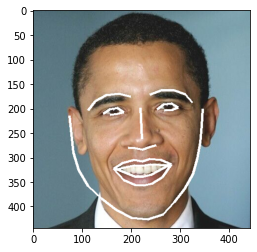

In [20]:
filename = 'obama.jpg'
image = face_recognition.load_image_file(filename)
landmarks = face_recognition.face_landmarks(image)
print(landmarks)
print('鼻樑位置：{}'.format(landmarks[0]['nose_bridge']))

img = Image.open(filename)
drawing = ImageDraw.Draw(img)
for landmark in landmarks:
    for feature in landmark.keys():
        drawing.line(landmark[feature], width=5)
plt.imshow(img)
plt.show()

In [ ]:
img1 = face_recognition.load_image_file('sample1.jpg')
img2 = face_recognition.load_image_file('sample2.jpg')
img3 = face_recognition.load_image_file('sample3.jpg')
encoding1 = face_recognition.face_encodings(img1)[0]
encoding2 = face_recognition.face_encodings(img2)[0]
encoding3 = face_recognition.face_encodings(img3)[0]
known_faces = [encoding1, encoding2, encoding3]
names = ['jeng', 'chiou', 'david']

unknown = face_recognition.load_image_file("catch.jpg")
# unknown = face_recognition.load_image_file("lily2.jpg")
encoding_unknown = face_recognition.face_encodings(unknown)[0]
results = face_recognition.compare_faces(known_faces, encoding_unknown)
print(results)
face = ''
for i in range(len(results)):
  if results[i]: face = face + names[i] + '  '
if face == '': print('圖片中辨識不到資料庫中人臉！')
else: print('圖片中的人臉：' + face)

In [ ]:
img1 = face_recognition.load_image_file('sample1.jpg')
img2 = face_recognition.load_image_file('sample2.jpg')
img3 = face_recognition.load_image_file('sample3.jpg')
encoding1 = face_recognition.face_encodings(img1)[0]
encoding2 = face_recognition.face_encodings(img2)[0]
encoding3 = face_recognition.face_encodings(img3)[0]
known_faces = [encoding1, encoding2, encoding3]
names = ['jeng', 'chiou', 'david']

unknown = face_recognition.load_image_file("catch.jpg")
#unknown = face_recognition.load_image_file("lily2.jpg")
encoding_unknown = face_recognition.face_encodings(unknown)[0]
distances = face_recognition.face_distance(known_faces, encoding_unknown)
print(distances)
face = ''
for i in range(len(distances)):
  if distances[i] < 0.5: face = face + names[i] + '  '
if face == '': print('圖片中辨識不到資料庫中人臉！')
else: print('圖片中的人臉：' + face)

## fer：偵測臉部表情

In [ ]:
!pip install fer

In [ ]:
from fer import FER
import cv2

In [ ]:
img = cv2.imread("angry1.jpg")
detector = FER()
emotion = detector.detect_emotions(img)
print(emotion)

In [ ]:
img = cv2.imread("angry1.jpg")
# img = cv2.imread("happy1.jpg")
detector = FER()
try:
  emotion, score = detector.top_emotion(img)
  print(emotion, score)
except:
  print('未偵測到人臉！')

In [ ]:
img = cv2.imread("happy1.jpg")
detector = FER(mtcnn=True)
try:
  emotion, score = detector.top_emotion(img)
  print(emotion, score)
except:
  print('未偵測到人臉！')

## facemask_detection：偵測是否戴口罩

In [ ]:
!pip install facemask_detection

In [ ]:
from facemask_detection.pre_trained_models import get_model as get_classifier
import albumentations as A
import torch
import cv2
import numpy as np

In [ ]:
model = get_classifier("tf_efficientnet_b0_ns_2020-07-29")
model.eval()
image1 = cv2.cvtColor(cv2.imread("mask1.jpg"), cv2.COLOR_BGR2RGB)
# image1 = cv2.cvtColor(cv2.imread("person1.jpg"), cv2.COLOR_BGR2RGB)
transform = A.Compose([A.SmallestMaxSize(max_size=256, p=1), 
                       A.CenterCrop(height=224, width=224, p=1),
                       A.Normalize(p=1)])
trans_image = transform(image=image1)['image']
input = torch.from_numpy(np.transpose(trans_image, (2, 0, 1))).unsqueeze(0)
print("戴口罩的機率為：", model(input)[0].item())

## facemask_detection：標示人物是否戴口罩

In [ ]:
!pip install facemask_detection
!pip install retinaface_pytorch

In [ ]:
from retinaface.pre_trained_models import get_model as get_detector
from facemask_detection.pre_trained_models import get_model as get_classifier
import albumentations as A
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
face_detector = get_detector("resnet50_2020-07-20", max_size=800)
face_detector.eval()
image1 = cv2.cvtColor(cv2.imread("mask3.jpg"), cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (10, 10)
plt.imshow(image1)
with torch.no_grad():
  annotations = face_detector.predict_jsons(image1)
print(annotations)

In [ ]:
mask_classifier = get_classifier("tf_efficientnet_b0_ns_2020-07-29")
mask_classifier.eval()
transform = A.Compose([A.SmallestMaxSize(max_size=256, p=1), 
                       A.CenterCrop(height=224, width=224, p=1),
                       A.Normalize(p=1)])
predictions = []
with torch.no_grad():
  for annotation in annotations:
    x_min, y_min, x_max, y_max = annotation['bbox']
    x_min = np.clip(x_min, 0, x_max)
    y_min = np.clip(y_min, 0, y_max)
    crop = image1[y_min:y_max, x_min:x_max]
    crop_transformed = transform(image=crop)['image']
    model_input = torch.from_numpy(np.transpose(crop_transformed, (2, 0, 1)))  
    predictions += [mask_classifier(model_input.unsqueeze(0))[0].item()] 
vis_image = image1.copy()
for prediction_id, annotation in enumerate(annotations):
    is_mask = predictions[prediction_id] > 0.5
    if is_mask:
      color = (255, 0, 0)    
      text = "mask"
    else:
      color = (0, 255, 0)
      text = "no mask"
    x_min, y_min, x_max, y_max = annotation["bbox"]
    x_min = np.clip(x_min, 0, x_max - 1)
    y_min = np.clip(y_min, 0, y_max - 1)
    vis_image = cv2.rectangle(vis_image, (x_min, y_min), (x_max, y_max), color=color, thickness=2)
    vis_image = cv2.putText(vis_image, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX,  0.4, color, 2, cv2.LINE_AA) 
plt.imshow(vis_image)

## Deepface：人臉特徵分析工具

In [ ]:
!pip install deepface

### 人臉偵測

In [ ]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

In [ ]:
imgpath = 'person1.jpg'
img_sr = cv2.imread(imgpath)
plt.imshow(cv2.cvtColor(img_sr, cv2.COLOR_BGR2RGB))

In [ ]:
image = DeepFace.detectFace(img_path=imgpath, enforce_detection=False)
plt.imshow(image)

In [ ]:
image.shape

In [ ]:
image *= 255.0
cv2.imwrite( "detectFace.jpg", image[:, :, ::-1])

In [ ]:
image = DeepFace.detectFace(img_path=imgpath, detector_backend='retinaface', enforce_detection=False)
#image = DeepFace.detectFace(img_path=imgpath, detector_backend='mtcnn')
#image = DeepFace.detectFace(img_path=imgpath, detector_backend='dlib')
#image = DeepFace.detectFace(img_path=imgpath, detector_backend='ssd')  #有錯誤
plt.imshow(image)

### 人臉驗證

In [ ]:
face1 = 'bear1.jpg'
face2 = 'bear2.jpg'
#face2 = 'jeng1.jpg'
#face2 = 'david1.jpg'
result = DeepFace.verify(face1, face2, model_name='DeepFace', model=DeepFace.build_model('DeepFace'), enforce_detection=False)
print(result)
if result["verified"]: print('兩張圖片是同一人！')
else: print('兩張圖片不是同一人！')

In [ ]:
face1 = 'bear1.jpg'
face2 = 'jeng1.jpg'
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"]
result =[]
for model in models: 
    ret= DeepFace.verify(face1, face2, model_name = model, enforce_detection=False)
    result.append(ret)
print(result)

### 搜尋人臉

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#尋找單一相同人臉
face1 = 'bear2.jpg'
df = DeepFace.find(img_path = face1, db_path = 'member', enforce_detection=False)
#print(df)
count = np.sum((df['VGG-Face_cosine']<=0.25)!=0) #計算符合的人臉數量
if count > 0:
  split1 = df['identity'][0].split('/')
  print(split1[-1])
else:
  print('沒有符合的人臉！')

In [ ]:
#尋找所有相同人臉
face1 = 'tem.jpg'
df = DeepFace.find(img_path = face1, db_path = 'member', enforce_detection=False)
#print(df)
count = np.sum((df['VGG-Face_cosine']<=0.25)!=0) #計算符合的人臉數量
if count > 0:
  for i in range(count):
    split1 = df['identity'][i].split('/')
    print(split1[-1])
else:
  print('沒有符合的人臉！')

### 範例：攝影機拍攝登入系統

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
import pandas as pd
import numpy as np

def take_photo(filename='person.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '拍攝';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

try:
  filename = take_photo()
  display(Image(filename))
except Exception as err:
  print('攝影錯誤：{}'.format(str(err)))

df = DeepFace.find(img_path = 'person.jpg', db_path = 'member', enforce_detection=False)
#print(df)
count = np.sum((df['VGG-Face_cosine']<=0.25)!=0) #計算符合的人臉數量
if count > 0:
  print('歡迎登入系統！')
else:
  print('抱歉！你不是會員！')

### 人臉屬性分析

In [ ]:
face1 = 'bear1.jpg'
img = cv2.imread(face1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
obj = DeepFace.analyze(img_path = face1, actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)
#print(obj)
print('年齡：{}'.format(obj['age']))
print('性別：{}'.format(obj['gender']))
print('種族：{}'.format(obj['dominant_race']))
print('情緒：{}'.format(obj['dominant_emotion']))

### 範例：攝影機拍攝人臉屬性分析

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

def take_photo(filename='person.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '拍攝';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

try:
  filename = take_photo()
  display(Image(filename))
except Exception as err:
  print('攝影錯誤：{}'.format(str(err)))

obj = DeepFace.analyze(img_path = 'person.jpg', actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)
label = {'angry':'生氣', 'disgust':'厭惡', 'fear':'恐懼', 'happy':'開心', 'neutral':'中性', 'sad':'悲傷', 'surprise':'吃驚',
          'Man':'男', 'Woman':'女',
          'asian':'亞洲', 'black':'黑', 'indian':'印第安', 'latino hispanic':'拉丁美洲', 'middle eastern':'中東', 'white':'白'}
print('\n你是{}歲的{}性{}人，目前情緒似乎是{}'.format(obj['age'], label[obj['gender']], label[obj['dominant_race']], label[obj['dominant_emotion']]))